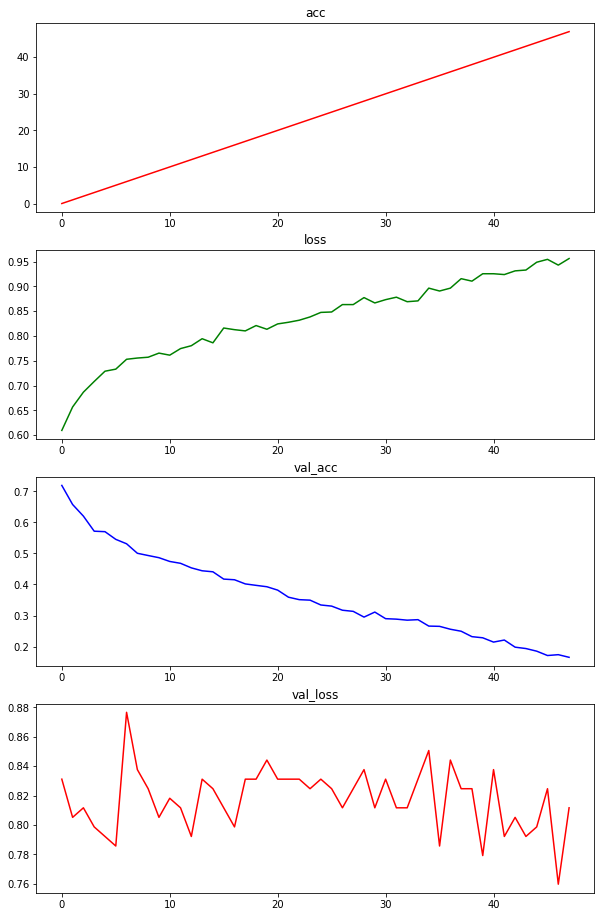

KeyboardInterrupt: 

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_auc_score, roc_curve
from IPython.display import clear_output
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

root_address = os.path.dirname(os.path.realpath(os.getcwd())).replace("/moloi/utils", "")
path = root_address + "/tmp/"

def plot_history(path):
    colors = ['r','g','b']
    columns = ['acc', 'loss', 'val_acc', 'val_loss']
    history = pd.read_csv(path, header=0, sep=';')
    history = np.array(history)
    x = np.array(history[:,0])
    
    plt.figure(figsize=(10, 4*len(columns)))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

    for i in range(len(columns)):
        y = np.array(history[:,i])
        plt.subplot(len(columns)*100 + 10 + i + 1)
        plt.plot(x, y, color=colors[i%len(colors)])
        plt.title(str(columns[i]))
        #plt.ylabel(str(keys[i]))
        #plt.xlabel('epoch')
    clear_output()
    plt.show()
    
def get_latest_file(path):
    all_dirs = os.listdir(path)
    for i, d in enumerate(all_dirs):
        all_dirs[i] = path+d
    latest_subdir = max(all_dirs, key=os.path.getmtime)
    return latest_subdir

while True:
    history = get_latest_file(path)
    history = history+'/history_run_FCNN.csv'
    if os.path.isfile(history):
        plot_history(history)
    time.sleep(5)